# Cross Convolution
Following Menke and Levin (2003)

The main idea is to compare data to model by minimising a cross convolution function.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("..")
import splitwavepy as sw

import numpy as np
import matplotlib.pyplot as plt

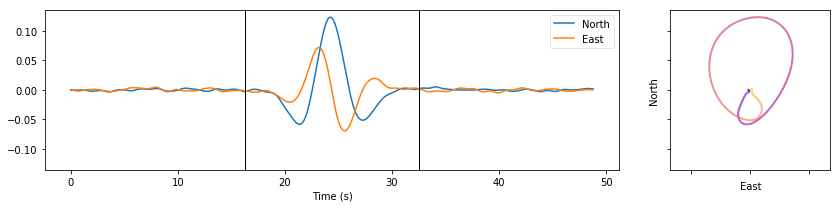

In [6]:
real = sw.Pair(delta=0.05,split=(40,1.2),noise=0.01)
real.plot()

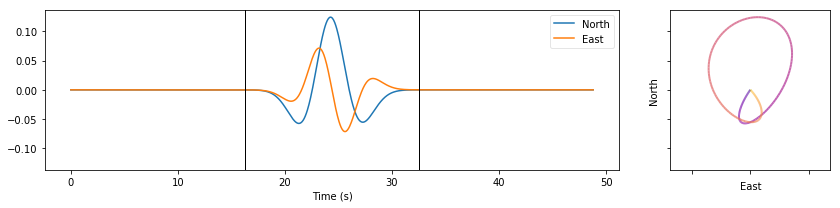

In [36]:
pred = sw.Pair(delta=0.05,split=(40,1.2),noise=0)
pred.plot()

In [37]:
def crossconv(real, pred):
    obs = real.chop()
    pre = pred.chop()
    x = np.convolve(obs.x, pre.y)
    y = np.convolve(pre.x, obs.y)
    return x, y

def misfit(x, y):
    num = np.trapz((x - y)**2)
    den = np.trapz(x**2) + np.trapz(y**2)
    return num / den

In [38]:
x, y = crossconv(real, pred)
print(misfit(x, y))

0.00081572584218


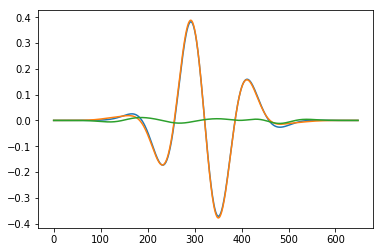

In [39]:
plt.plot(x)
plt.plot(y)
plt.plot(x - y)
plt.show()